In [54]:
import pickle

In [59]:
file_path = "nsmount/RIT_Eyes/backup/s-general/s-general/1/1-general.p"

In [60]:
with open(file_path, 'rb') as file:
    loaded_data = pickle.load(file)

In [64]:
loaded_data.keys()

dict_keys(['camera_3d_center', 'camera_distance', 'iris_loc', 'eye_loc', 'gaze_angle_az', 'gaze_angle_el', 'ortho_scale', 'cam_az', 'cam_el', 'glasses', 'pupil', 'eye_lid', 'iris_rot', 'left_corner', 'right_corner', 'sclera'])

'camera_3d_center': 카메라 중심의 3D 좌표.

'camera_distance': 카메라에서 눈까지의 거리.

'iris_loc': 홍채 중심의 3D 좌표.

'eye_loc': 눈 중심의 3D 좌표.

'gaze_angle_az': 방위각에서의 시선 각도 (수평 방향).

'gaze_angle_el': 고도각에서의 시선 각도 (수직 방향).

'ortho_scale': 직교 투영일 경우 관련이 있는 직교 스케일.

'cam_az': 카메라 방위각 (카메라의 수평 각도).

'cam_el': 카메라 고도각 (카메라의 수직 각도).

'glasses': 안경과 관련된 정보, 가능한 존재 여부 또는 특징.

'pupil': 동공과 관련된 정보, 가능한 크기 또는 모양.

'eye_lid': 눈꺼풀과 관련된 정보, 가능한 위치 또는 상태.

'iris_rot': 홍채의 회전 정보, 가능한 방향.

'left_corner': 눈의 왼쪽 모서리의 3D 좌표.

'right_corner': 눈의 오른쪽 모서리의 3D 좌표.

'sclera': 눈의 흰 부분인 세포와 관련된 정보, 가능한 특징.

In [139]:
loaded_data["iris_loc"]

[[0.03500239923596382, -1.0023376941680908, 0.010153090581297874],
 [-0.2814198136329651, -0.9623806476593018, -0.025205399841070175],
 [-0.1777152419090271, -0.9496130347251892, -0.269557923078537],
 [-0.11889637261629105, -0.9825066328048706, 0.16295240819454193],
 [-0.13527795672416687, -0.9748956561088562, -0.19309954345226288],
 [-0.23301255702972412, -0.8757256269454956, -0.42990556359291077],
 [-0.18716998398303986, -0.9811792969703674, -0.09090448915958405],
 [0.05764121562242508, -0.9702120423316956, 0.24774011969566345],
 [0.23408232629299164, -0.9602442979812622, -0.17072007060050964],
 [-0.003365327138453722, -0.9640913605690002, -0.27663251757621765],
 [-0.0934303030371666, -0.9883893132209778, 0.1427103728055954],
 [-0.30860021710395813, -0.9013474583625793, -0.31360456347465515],
 [-0.4173096716403961, -0.9031409621238708, -0.1272721290588379],
 [0.16646051406860352, -0.8894738554954529, -0.4325924515724182],
 [0.33076420426368713, -0.8799838423728943, 0.3496177494525909

# 눈 이미지 비교해서 불러오기

In [19]:
import os
from scipy import io
import sys
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pickle
import tifffile as tiff

In [85]:
img_file1 = "nsmount/RIT_Eyes/backup/s-openeds/s-openeds/1/mask-withoutskin/0000.tif"
img_file2 = "nsmount/RIT_Eyes/s-general/s-general/1/mask-withoutskin-noglasses/0000.tif"
img_file3 = "nsmount/RIT_Eyes/s-general/s-general/1/mask-withskin/0000.tif"
img_file4 = "nsmount/RIT_Eyes/backup/s-nvgaze/s-nvgaze/1/synthetic/0000.tif"

In [44]:
print("이미지 크기:", d.shape)  # (높이, 너비, 채널)
print("이미지 데이터 타입:", d.dtype)  # 픽셀 데이터 타입
print("픽셀 값 (좌상단 픽셀):", d[0,0])  # 좌상단 픽셀의 BGR 값

이미지 크기: (480, 640, 3)
이미지 데이터 타입: uint8
픽셀 값 (좌상단 픽셀): [122 122 122]


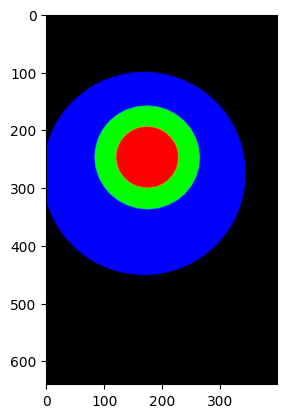

In [78]:
a = tiff.imread(img_file1)

plt.imshow(a)
plt.show()

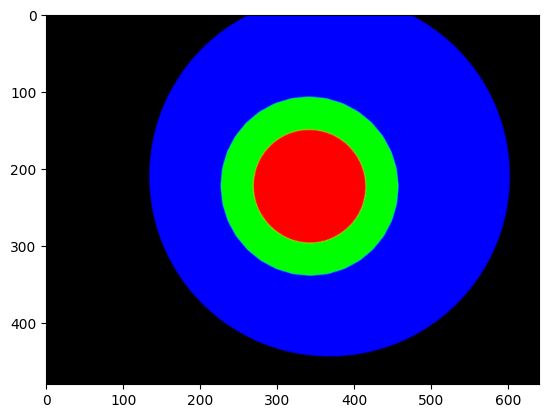

In [24]:
b = tiff.imread(img_file2)


plt.imshow(b)
plt.show()

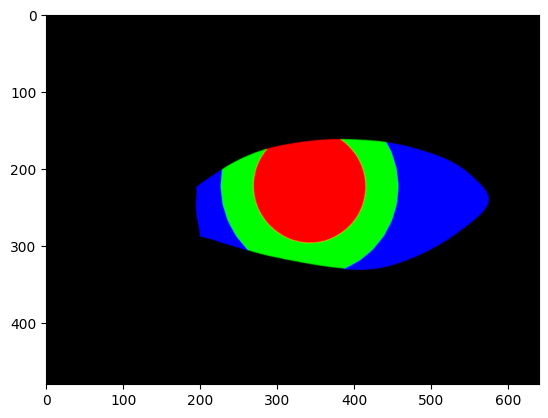

In [25]:
c = tiff.imread(img_file3)


plt.imshow(c)
plt.show()

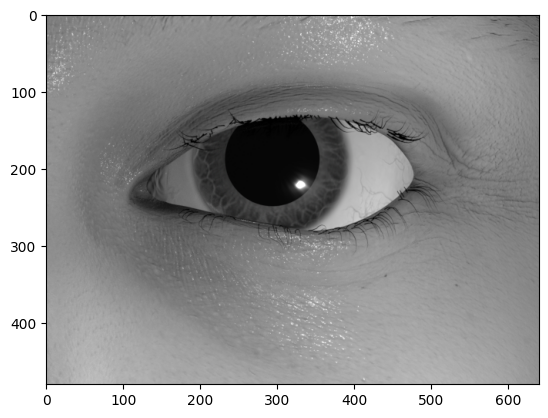

In [86]:
d = tiff.imread(img_file4)


plt.imshow(d)
plt.show()

# 2D GAZE 시각화

In [ ]:
2.000000	0.579997

# VOLUME 확인

In [92]:
2000*24*4

192000

# 데이터 분포확인

## s-natural

In [96]:
import pandas as pd
import pickle

base_path =  "nsmount/Rit_Eyes/data/RGB/labeldata/s-natural"

# Initialize an empty DataFrame to store the combined data
total_label_data1 = pd.DataFrame()

# Example usage:
#for file_name in tqdm(os.listdir(base_path), desc="processing Image files"):
for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)
    
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        # Check if the file is a .label file
        if file_name.endswith(".p"):
            # Load data from the pickle file
            with open(file_path, 'rb') as file:
                data = pickle.load(file)

            # Extract the 'look_vec' column and create a DataFrame
            look_vec_x = data["gaze_angle_az"]
            look_vec_y = data["gaze_angle_el"]
            
            # Create a DataFrame
            label_data = pd.DataFrame({'look_vec_x': look_vec_x, 'look_vec_y': look_vec_y})
            
            # Concatenate the data to the total_label_data DataFrame
            total_label_data1 = pd.concat([total_label_data1, label_data], ignore_index=True)

# Display the combined DataFrame
total_label_data1

,look_vec_x,look_vec_y
0,2.000000,0.579997
1,-16.300001,-1.439998
2,-10.600000,-15.589998
3,-6.900001,9.350001
4,-7.900000,-11.100002
...,...,...
47995,-20.199999,-0.150000
47996,-0.800000,-25.989999
47997,19.900000,21.839999
47998,16.100001,8.900000


## joint plot

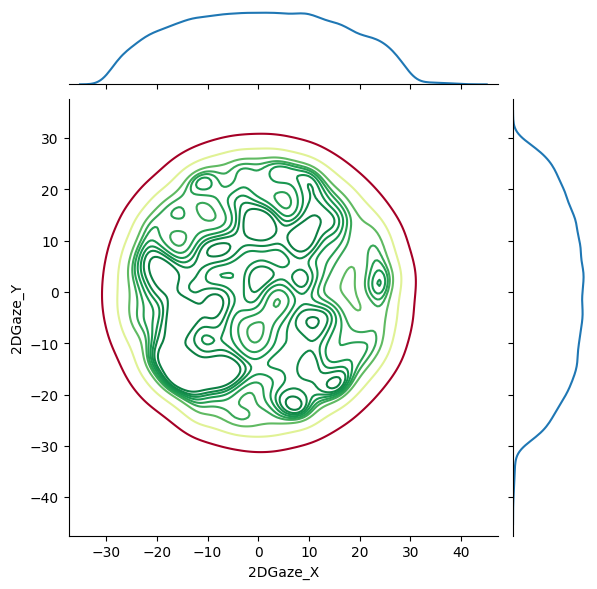

<Figure size 1600x1200 with 0 Axes>

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'total_label_data' DataFrame is already created from your previous code

# Plotting the jointplot
sns.jointplot(data=total_label_data1, x='look_vec_x', y='look_vec_y', kind='kde', cmap='RdYlGn')
plt.xlabel('2DGaze_X',fontsize=10)
plt.ylabel('2DGaze_Y',fontsize=10)
plt.figure(figsize=(16, 12))
plt.show()

## heat map

<Figure size 1600x1200 with 0 Axes>

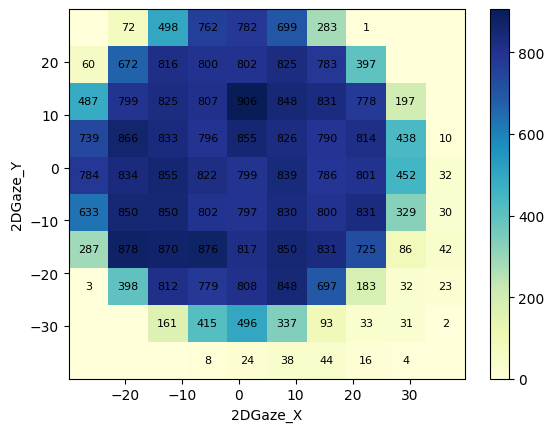

<Figure size 1600x1200 with 0 Axes>

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'total_label_data' DataFrame is already created from your previous code

cmap = sns.color_palette("YlGnBu", as_cmap=True)

# Create a 2D histogram with annotations
hist_data, x_edges, y_edges, im = plt.hist2d(total_label_data1['look_vec_x'], total_label_data1['look_vec_y'], bins=10, cmap=cmap)

# Annotate each bin with its count
for i in range(len(x_edges) - 1):
    for j in range(len(y_edges) - 1):
        count = int(hist_data[i, j])
        if count > 0:
            x_center = (x_edges[i] + x_edges[i + 1]) / 2
            y_center = (y_edges[j] + y_edges[j + 1]) / 2
            if count > 30000 : 
                plt.text(x_center, y_center, str(count), color='white',
                    ha='center', va='center', fontsize=8)
            else :
                plt.text(x_center, y_center, str(count), color='black',
                    ha='center', va='center', fontsize=8)
# Add a color bar
cbar = plt.colorbar(im)

plt.xlabel('2DGaze_X',fontsize=10)
plt.ylabel('2DGaze_Y',fontsize=10)
plt.figure(figsize=(16, 12))


## s-general

In [102]:
import pandas as pd
import pickle

base_path =  "nsmount/Rit_Eyes/data/IR/labeldata/s-general"

# Initialize an empty DataFrame to store the combined data
total_label_data2 = pd.DataFrame()

# Example usage:
#for file_name in tqdm(os.listdir(base_path), desc="processing Image files"):
for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)
    
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        # Check if the file is a .label file
        if file_name.endswith(".p"):
            # Load data from the pickle file
            with open(file_path, 'rb') as file:
                data = pickle.load(file)

            # Extract the 'look_vec' column and create a DataFrame
            look_vec_x = data["gaze_angle_az"]
            print(len(look_vec_x))
            look_vec_y = data["gaze_angle_el"]
            print(len(look_vec_y))
            
            # Create a DataFrame
            label_data = pd.DataFrame({'look_vec_x': look_vec_x, 'look_vec_y': look_vec_y})
            
            # Concatenate the data to the total_label_data DataFrame
            total_label_data2 = pd.concat([total_label_data2, label_data], ignore_index=True)

# Display the combined DataFrame
total_label_data2

2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000


,look_vec_x,look_vec_y
0,2.000000,0.579997
1,-16.300001,-1.439998
2,-10.600000,-15.589998
3,-6.900001,9.350001
4,-7.900000,-11.100002
...,...,...
47995,-20.199999,-0.150000
47996,-0.800000,-25.989999
47997,19.900000,21.839999
47998,16.100001,8.900000


## joint plot

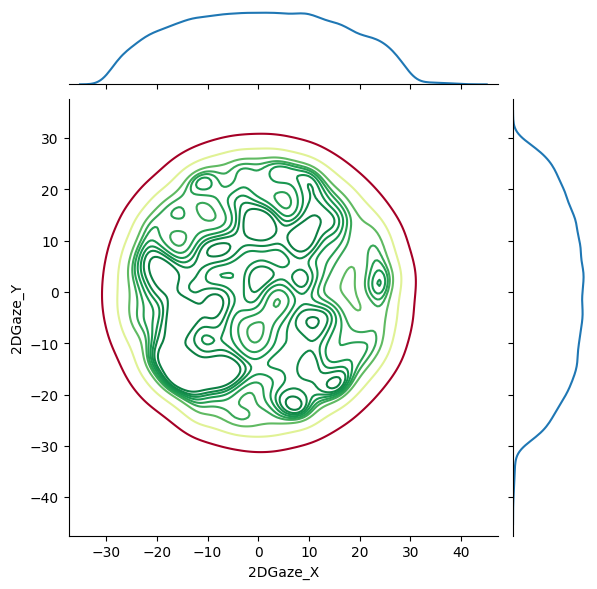

<Figure size 1600x1200 with 0 Axes>

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'total_label_data' DataFrame is already created from your previous code

# Plotting the jointplot
sns.jointplot(data=total_label_data2, x='look_vec_x', y='look_vec_y', kind='kde', cmap='RdYlGn')
plt.xlabel('2DGaze_X',fontsize=10)
plt.ylabel('2DGaze_Y',fontsize=10)
plt.figure(figsize=(16, 12))
plt.show()

## heat map

<Figure size 1600x1200 with 0 Axes>

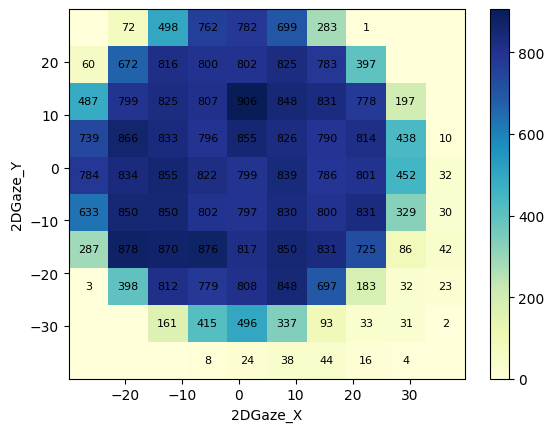

<Figure size 1600x1200 with 0 Axes>

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'total_label_data' DataFrame is already created from your previous code

cmap = sns.color_palette("YlGnBu", as_cmap=True)

# Create a 2D histogram with annotations
hist_data, x_edges, y_edges, im = plt.hist2d(total_label_data2['look_vec_x'], total_label_data2['look_vec_y'], bins=10, cmap=cmap)

# Annotate each bin with its count
for i in range(len(x_edges) - 1):
    for j in range(len(y_edges) - 1):
        count = int(hist_data[i, j])
        if count > 0:
            x_center = (x_edges[i] + x_edges[i + 1]) / 2
            y_center = (y_edges[j] + y_edges[j + 1]) / 2
            if count > 30000 : 
                plt.text(x_center, y_center, str(count), color='white',
                    ha='center', va='center', fontsize=8)
            else :
                plt.text(x_center, y_center, str(count), color='black',
                    ha='center', va='center', fontsize=8)
# Add a color bar
cbar = plt.colorbar(im)

plt.xlabel('2DGaze_X',fontsize=10)
plt.ylabel('2DGaze_Y',fontsize=10)
plt.figure(figsize=(16, 12))


## s-nvgaze

In [108]:
p_path =  "nsmount/Rit_Eyes/data/IR/labeldata/s-nvgaze"

#for file_name in tqdm(os.listdir(p_path), desc="processing Image files"):
for folder_name in os.listdir(p_path):
    folder_path = os.path.join(p_path, folder_name)
    
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        # Check if the file is a .label file
        if file_name.endswith(".p"):
            # Load data from the pickle file
            with open(file_path, 'rb') as file:
                data1 = pickle.load(file)
                print(len(data1["gaze_angle_az"]),len(data1["gaze_angle_el"]))

2200 2200
2000 2000
2000 2000
2000 4000
2200 2200
2200 2200
2200 2200
2200 2200
2200 2200
2200 2200
2200 2200
2200 2200
2200 2200
2200 2200
2000 2000
2000 2000
2000 2000
2200 2200
2200 2200
2200 2200
2200 2200
2200 2200
2200 2200
2200 2200


In [144]:
6*2000 + 18*2200 

51600

In [115]:
p_path =  "nsmount/Rit_Eyes/data/IR/labeldata/s-nvgaze/4/4-snvgaze.p"

with open(p_path, 'rb') as file:
    data2 = pickle.load(file)

-12.200000225659442

In [131]:
print(data2["gaze_angle_az"][4])
print(data2["gaze_angle_az"][2000])

6.300000858332389
-12.200000225659442


In [104]:
import pandas as pd
import pickle

base_path =  "nsmount/Rit_Eyes/data/IR/labeldata/s-nvgaze"

# Initialize an empty DataFrame to store the combined data
total_label_data3 = pd.DataFrame()

# Example usage:
#for file_name in tqdm(os.listdir(base_path), desc="processing Image files"):
for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)
    
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        # Check if the file is a .label file
        if file_name.endswith(".p"):
            # Load data from the pickle file
            with open(file_path, 'rb') as file:
                data = pickle.load(file)

            # Extract the 'look_vec' column and create a DataFrame
            look_vec_x = data["gaze_angle_az"]
            print(len(look_vec_x))
            look_vec_y = data["gaze_angle_el"]
            print(len(look_vec_y))
            
            # Create a DataFrame
            label_data = pd.DataFrame({'look_vec_x': look_vec_x, 'look_vec_y': look_vec_y})
            
            # Concatenate the data to the total_label_data DataFrame
            total_label_data3 = pd.concat([total_label_data3, label_data], ignore_index=True)

# Display the combined DataFrame
total_label_data3

2200
2200
2000
2000
2000
2000
2000
4000


ValueError: All arrays must be of the same length

## s-openeds

In [103]:
import pandas as pd
import pickle

base_path =  "nsmount/Rit_Eyes/data/IR/labeldata/s-openeds"

# Initialize an empty DataFrame to store the combined data
total_label_data4 = pd.DataFrame()

# Example usage:
#for file_name in tqdm(os.listdir(base_path), desc="processing Image files"):
for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)
    
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        # Check if the file is a .label file
        if file_name.endswith(".p"):
            # Load data from the pickle file
            with open(file_path, 'rb') as file:
                data = pickle.load(file)

            # Extract the 'look_vec' column and create a DataFrame
            look_vec_x = data["gaze_angle_az"]
            print(len(look_vec_x))
            look_vec_y = data["gaze_angle_el"]
            print(len(look_vec_y))
            # Create a DataFrame
            label_data = pd.DataFrame({'look_vec_x': look_vec_x, 'look_vec_y': look_vec_y})
            
            # Concatenate the data to the total_label_data DataFrame
            total_label_data4 = pd.concat([total_label_data4, label_data], ignore_index=True)

# Display the combined DataFrame
total_label_data4

2200
2200
2000
2000
2000
2000
2000
2000
2200
2200
2200
2200
2200
2200
2200
2200
2200
2200
2200
2200
2200
2200
2200
2200
2200
2200
2200
2200
2000
2000
2000
2000
2000
2000
2200
2200
2200
2200
2200
2200
2200
2200
2200
2200
2200
2200
2200
2200


,look_vec_x,look_vec_y
0,2.000000,0.579997
1,-16.300001,-1.439998
2,-10.600000,-15.589998
3,-6.900001,9.350001
4,-7.900000,-11.100002
...,...,...
51595,-15.900001,-10.440001
51596,-11.300000,-1.559997
51597,5.300000,25.540001
51598,-17.300000,-22.959998


## joint plot

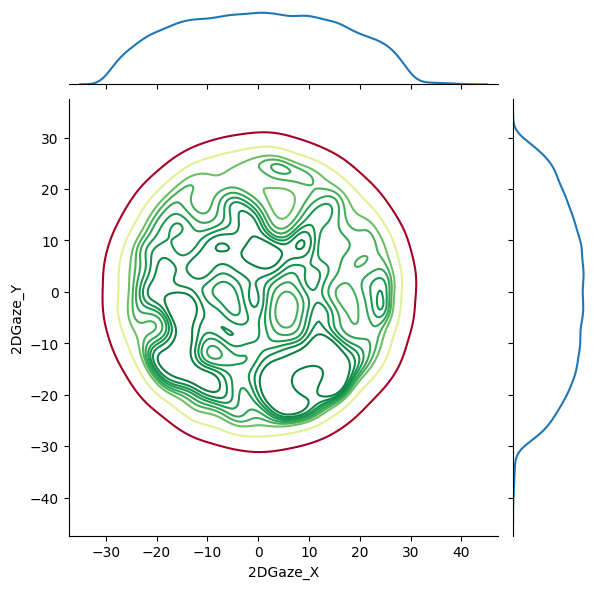

<Figure size 1600x1200 with 0 Axes>

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'total_label_data' DataFrame is already created from your previous code

# Plotting the jointplot
sns.jointplot(data=total_label_data4, x='look_vec_x', y='look_vec_y', kind='kde', cmap='RdYlGn')
plt.xlabel('2DGaze_X',fontsize=10)
plt.ylabel('2DGaze_Y',fontsize=10)
plt.figure(figsize=(16, 12))
plt.show()

## heat map

<Figure size 1600x1200 with 0 Axes>

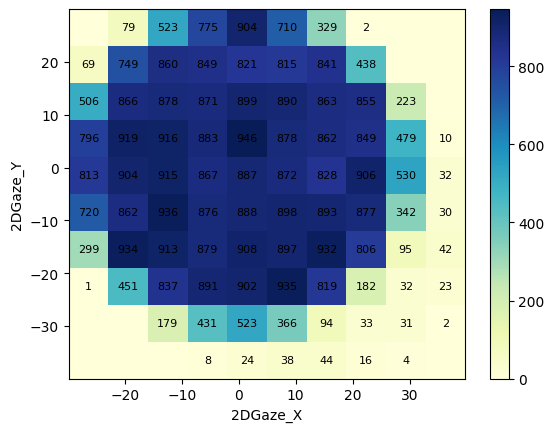

<Figure size 1600x1200 with 0 Axes>

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'total_label_data' DataFrame is already created from your previous code

cmap = sns.color_palette("YlGnBu", as_cmap=True)

# Create a 2D histogram with annotations
hist_data, x_edges, y_edges, im = plt.hist2d(total_label_data4['look_vec_x'], total_label_data4['look_vec_y'], bins=10, cmap=cmap)

# Annotate each bin with its count
for i in range(len(x_edges) - 1):
    for j in range(len(y_edges) - 1):
        count = int(hist_data[i, j])
        if count > 0:
            x_center = (x_edges[i] + x_edges[i + 1]) / 2
            y_center = (y_edges[j] + y_edges[j + 1]) / 2
            if count > 30000 : 
                plt.text(x_center, y_center, str(count), color='white',
                    ha='center', va='center', fontsize=8)
            else :
                plt.text(x_center, y_center, str(count), color='black',
                    ha='center', va='center', fontsize=8)
# Add a color bar
cbar = plt.colorbar(im)

plt.xlabel('2DGaze_X',fontsize=10)
plt.ylabel('2DGaze_Y',fontsize=10)
plt.figure(figsize=(16, 12))
